<a href="https://colab.research.google.com/github/Rosemy7/cafe-and-bakery/blob/main/Cafe_and_Bakery.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Dataset
dataset 1: https://www.kaggle.com/datasets/alexanderjohn/bakery-sales-for-fooddrinks

dataset 2: https://www.kaggle.com/code/ahmedabbas757/coffee-shop-sales

dataset 3: https://www.kaggle.com/datasets/akashdeepkuila/bakery

dataset 4: https://www.kaggle.com/datasets/sanyamgoyal401/customer-purchases-behaviour-dataset/data

##Import

In [ ]:
#Import
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import skew
import scipy.stats as stats

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Project datascience/Project Bakery Coffee/dataset2.csv')

EDA & Preprocessing

##EDA

In [ ]:
df.head()

,customer_id,product_name,product_id,transaction_qty,selling_price,store_id,store_location,date_t,time_t,daytype,age,gender
0,1,Caramel bites,32,2.0,30000,5.0,Lower Manhattan,2024-06-30,07:06:11,Weekend,27,Male
1,1,Caramel bites,32,2.0,30000,5.0,Lower Manhattan,2024-06-30,07:43:11,Weekend,27,Male
2,1,Caramel bites,32,2.0,30000,5.0,Lower Manhattan,2024-06-30,07:47:11,Weekend,27,Male
3,1,Caramel bites,32,2.0,30000,5.0,Lower Manhattan,2024-06-30,07:57:11,Weekend,27,Male
4,2,Empanadas,57,2.0,31000,5.0,Lower Manhattan,2024-06-30,07:08:56,Weekend,29,Male


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93668 entries, 0 to 93667
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   customer_id      93668 non-null  int64  
 1   product_name     93668 non-null  object 
 2   product_id       93668 non-null  int64  
 3   transaction_qty  93668 non-null  float64
 4   selling_price    93668 non-null  int64  
 5   store_id         93668 non-null  float64
 6   store_location   93668 non-null  object 
 7   date_t           93668 non-null  object 
 8   time_t           93668 non-null  object 
 9   daytype          93668 non-null  object 
 10  age              93668 non-null  int64  
 11  gender           93668 non-null  object 
dtypes: float64(2), int64(4), object(6)
memory usage: 8.6+ MB


In [ ]:
#deteksi missing value
df.isnull().sum()

,0
customer_id,0
product_name,0
product_id,0
transaction_qty,0
selling_price,0
store_id,0
store_location,0
date_t,0
time_t,0
daytype,0


In [ ]:
#statistik deskriptif
df.describe()

,customer_id,product_id,transaction_qty,selling_price,store_id,age
count,93668.000000,93668.000000,93668.000000,93668.000000,93668.000000,93668.000000
mean,42587.080422,47.933158,1.433414,31179.132297,5.354390,30.010452
std,26533.882212,17.840332,0.533415,7081.512006,2.077561,4.483541
min,1.000000,1.000000,1.000000,20000.000000,3.000000,12.000000
25%,18837.750000,34.000000,1.000000,25000.000000,3.000000,27.000000
50%,42254.500000,47.000000,1.000000,30000.000000,5.000000,30.000000
75%,65671.250000,60.000000,2.000000,37500.000000,8.000000,33.000000
max,89088.000000,87.000000,3.500000,45000.000000,8.000000,49.000000


In [ ]:
#duplikasi
is_duplicate = df.duplicated().any()

#periksa duplicate, jika ada tampilkan
if is_duplicate:
  print('Terdapat duplicate di dataset')
else:
  print('Tidak terdapat duplicate di dataset')

Tidak terdapat duplicate di dataset


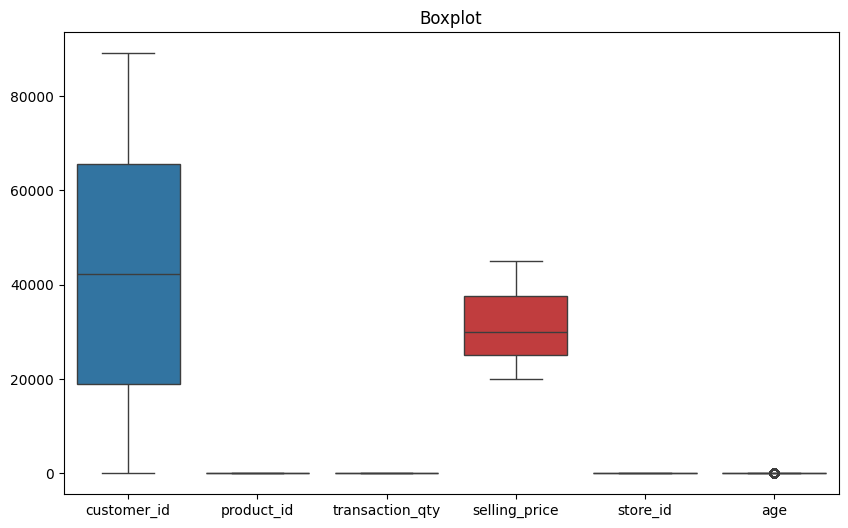

In [ ]:
#periksa variabel mana saja yang terdapat outlier
plt.figure(figsize=(10, 6))
sns.boxplot(data=df)
plt.title('Boxplot')
plt.show()

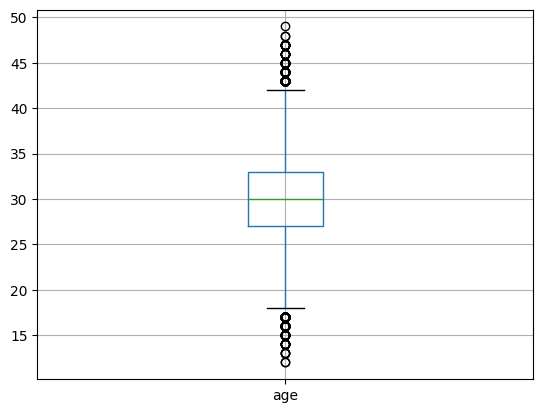

In [ ]:
#periksa variabel Age
df.boxplot(column=['age'])
plt.show()

In [ ]:
df['age'].describe()

,age
count,93668.000000
mean,30.010452
std,4.483541
min,12.000000
25%,27.000000
50%,30.000000
75%,33.000000
max,49.000000


In [ ]:
df['age'].value_counts().sort_index()

,count
age,
12,2
13,4
14,12
15,39
16,62
17,122
18,226
19,430
20,682


Berdasarkan hasil EDA
1. tidak terdapat missing value pada tiap variabel/kolom
2. tidak terdapat outlier,karena meski pada kolom age terlihat ada outlier, ini bukan lah outlier yang harus diatasi karena berasal kan dari structure kolom age nya sendiri
3. tidak terdapat duplikasi

##Preprocessing


berdasarkan EDA terdapat 2 kolom yang dijadikan target diantaranya:
1. Product
2. Transaction_qty

pada kali ini target nya adalah "product"

Product

###Feature Engineering

1. Buyer generation
digunakan untuk mengelompokkan pembeli berdasarkan generasi dengan mengambil data dari kolom age. code ini menggunakan:  
- **Function (`def`)** → Mendefinisikan fungsi `categorize_generation()` untuk mengelompokkan usia ke dalam generasi.  
- **Conditional Statements (`if-elif-else`)** → Menentukan kategori generasi berdasarkan nilai **`age`**.  
- **`apply()` Function** → Menerapkan fungsi ke setiap nilai di kolom **`age`** untuk membuat kolom baru **`buyer_generation`**.  

In [ ]:
#buyer generation

def categorize_generation(age):
    if age >= 13 and age <= 28:
        return "Gen Z" #gen Z tahun 1997 - 2012
    elif age >= 29 and age <= 45:  # Millennial (lahir 1981-1996)
        return "Millennial"
    elif age >= 46 and age <= 58:  # Gen X (lahir 1965-1980)
        return "Gen X"
    elif age >= 59:
        return "Boomer"
    else:
        return "Unknown"

df["buyer_generation"] = df["age"].apply(categorize_generation)

2. Day part digunakan untuk mengelompokkan waktu transaksi berdasarkan bagian hari (pagi, siang, malam) dengan mengambil data dari kolom time_t. Dalam code ini:

* Function (def) → Mendefinisikan fungsi categorize_daypart() untuk mengelompokkan waktu transaksi ke dalam bagian hari.
* Conditional Statements (if-elif-else) → Menentukan kategori waktu berdasarkan jam transaksi.
* pd.to_datetime() → Mengonversi kolom time_t menjadi format datetime agar bisa diekstrak jamnya.
* Datetime accessor (.dt.hour) → Mengambil jam dari kolom time_t.
* apply() Function → Menerapkan fungsi categorize_daypart() untuk membuat kolom baru daypart.


In [ ]:
#daypart
def categorize_daypart(hour):
    if 5 <= hour < 12:
        return "Morning"
    elif 12 <= hour < 18:
        return "Afternoon"
    else:
        return "Night"  # Untuk jam 18:00 - 04:59

# Pastikan "time_t" bertipe datetime
df["time_t"] = pd.to_datetime(df["time_t"], errors="coerce")


# Ambil hanya jamnya dan terapkan fungsi kategorisasi
df["daypart"] = df["time_t"].dt.hour.apply(categorize_daypart)


In [ ]:
df["time_t"] = df["time_t"].dt.strftime("%H:%M:%S")

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93668 entries, 0 to 93667
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customer_id       93668 non-null  int64  
 1   product_name      93668 non-null  object 
 2   product_id        93668 non-null  int64  
 3   transaction_qty   93668 non-null  float64
 4   selling_price     93668 non-null  int64  
 5   store_id          93668 non-null  float64
 6   store_location    93668 non-null  object 
 7   date_t            93668 non-null  object 
 8   time_t            93668 non-null  object 
 9   daytype           93668 non-null  object 
 10  age               93668 non-null  int64  
 11  gender            93668 non-null  object 
 12  buyer_generation  93668 non-null  object 
 13  daypart           93668 non-null  object 
dtypes: float64(2), int64(4), object(8)
memory usage: 10.0+ MB


In [ ]:
# Melihat daftar unik produk dalam dataset
df['product_name'].unique()

array(['Caramel bites', 'Empanadas', 'Fairy Doors', 'Berry Tart', 'Juice',
       'Bread Pudding', 'Coffee Eclair', 'Extra Salami or Feta',
       "Ella's Kitchen Pouches", 'Casino Cake', 'Cookies',
       'Mighty Protein', 'Christmas common', 'Chocolate Croissant',
       'Focaccia', 'Hack the stack', 'Chocolate Cake', 'Chocolate Eclair',
       'Jammie Dodgers', 'Chocolate Tart', 'Chicken Stew',
       'Bottled Water', 'Bread', 'Brioche and salami', 'Dulce de Leche',
       'Eggs', 'Blueberry Danish', 'Farm House', 'Keeping It Local',
       'Chocolate Meringue', 'Coke', 'Blackberry Tart', 'Chocolates',
       'Blueberry Tart', 'Cheese Croissant', 'Cherry Tart', 'Hot Coffee',
       'Drinking chocolate spoons', 'Chocolate Coffee', 'Chicken sand',
       'Honey', 'Cherry Soda', 'Half slice Monster', 'Hot chocolate',
       'Jam', 'Cake', 'Coffee', 'Crepes', 'Brownie', 'Ganache Cookie',
       'Apricot Croissant', 'Fudge', 'Almond Tart', 'Apple Danish',
       'Gingerbread syrup', 'Lem

3. Product category  digunakan untuk mengelompokkan produk berdasarkan jenisnya, seperti Coffee, Bakery & Pastry, Savory Food, Desserts, Beverages, dan Snacks. code ini menggunakan:  

- **Function (`def`)** → Mendefinisikan fungsi `categorize_product()` untuk mengelompokkan produk berdasarkan kategori.  
- **Set Data Structure (`{}`)** → Menyimpan daftar produk dalam kategori **coffee, bakery, savory, dessert, beverages, dan snacks**.  
- **Conditional Statements (`if-elif-else`)** → Memeriksa apakah `product_name` ada dalam salah satu kategori dan mengembalikan label yang sesuai.  
- **`apply()` Function** → Menerapkan fungsi `categorize_product()` pada kolom **`product_name`** untuk membuat kolom baru **`product_category`**.

In [ ]:
#product category
def categorize_product(product_name):
    coffee = {"Coffee", "Hot Coffee", "Chocolate Coffee", "Hot Chocolate", "Drinking chocolate spoons", "Gingerbread syrup"}
    bakery = {"Chocolate Croissant", "Cheese Croissant", "Almond Croissant", "Apricot Croissant",
              "Apple Danish", "Blueberry Danish", "Apricot Danish",
              "Berry Tart", "Chocolate Tart", "Lemon Tart", "Cherry Tart", "Almond Tart", "Blackberry Tart", "Apricot Tart", "Apple Tart",
              "Chocolate Cake", "Lemon Cake", "Casino Cake",
              "Brownie", "Ganache Cookie", "Cookies", "Jammie Dodgers"}
    savory = {"Chicken sand", "Chicken Stew",
              "Brioche and salami", "Extra Salami or Feta", "Bacon",
              "Eggs", "Bread Pudding", "Bread", "Baguette", "Focaccia"}
    dessert = {"Dulce de Leche", "Chocolate Eclair", "Coffee Eclair", "Chocolate Meringue",
                "Chocolate", "Fudge", "Fairy Doors", "Alfajores",
                "Apple Pie", "Bakewell", "Honey", "Jam"}
    beverages = {"Juice", "Bottled Water", "Coke", "Cherry Soda", "Lemon Lemonade"}
    snacks = {"Bare Popcorn", "Mighty Protein", "Hack the stack", "Half slice Monster", "Basket",
              "Crepes", "Empanadas", "Caramel bites", "Farm House", "Keeping It Local", "Christmas common"}

    if product_name in coffee:
        return "Coffee"
    elif product_name in bakery:
        return "Bakery & Pastry"
    elif product_name in savory:
        return "Savory Food"
    elif product_name in dessert:
        return "Confectionery & Desserts"
    elif product_name in beverages:
        return "Beverages (Non-Coffee)"
    elif product_name in snacks:
        return "Snacks & Miscellaneous"
    else:
        return "Unknown"  # Harusnya tidak ada yang masuk kategori ini

# Menambahkan kolom baru ke DataFrame
df["product_category"] = df["product_name"].apply(categorize_product)


In [ ]:
# Cek jumlah unik store_id dan store_location
print("Jumlah store_id unik:", df["store_id"].nunique())
print("Jumlah store_location unik:", df["store_location"].nunique())

# Cek distribusi store_location
print(df["store_location"].value_counts().head(10))  # Top 10 lokasi terbanyak

# Cek distribusi store_id
print(df["store_id"].value_counts().head(10))  # Top 10 store_id terbanyak

Jumlah store_id unik: 3
Jumlah store_location unik: 3
store_location
Hell's Kitchen     32163
Astoria            31647
Lower Manhattan    29858
Name: count, dtype: int64
store_id
8.0    32163
3.0    31647
5.0    29858
Name: count, dtype: int64


4. Store_type, digunakan untuk mengelompokkan lokasi toko ke dalam tipe tertentu, seperti Urban Store, Suburban Store, dan Downtown Store, berdasarkan kolom store_location.Code ini menggunakan:  
- **`.map()` Function** → Untuk mengganti nilai di kolom **`store_location`** dengan kategori yang sesuai di **`store_type`** berdasarkan dictionary mapping.

In [ ]:
#store_type
df["store_type"] = df["store_location"].map({
    "Hell's Kitchen": "Urban Store",
    "Astoria": "Suburban Store",
    "Lower Manhattan": "Downtown Store"
})

5. season digunakan untuk mengelompokkan transaksi berdasarkan musim (Winter, Spring, Summer, Fall) berdasarkan kolom **`date_t`**.  Code ini menggunakan:  
- **Function (`def`)** → Mendefinisikan fungsi `categorize_season()` untuk menentukan musim berdasarkan bulan.  
- **Conditional Statements (`if-elif-else`)** → Mengelompokkan bulan ke dalam empat musim.  
- **`pd.to_datetime()`** → Mengonversi kolom **`date_t`** ke format datetime.  
- **Datetime accessor (`.dt.month`)** → Mengambil nilai bulan dari kolom **`date_t`**.  
- **`apply()` Function** → Menerapkan fungsi `categorize_season()` ke setiap nilai bulan.

In [ ]:
#seasonality
def categorize_season(month):
    if month in [12, 1, 2]:
        return "Winter"
    elif month in [3, 4, 5]:
        return "Spring"
    elif month in [6, 7, 8]:
        return "Summer"
    else:
        return "Fall"

df["season"] = pd.to_datetime(df["date_t"]).dt.month.apply(categorize_season)


6. Total_price digunakan untuk menghitung total harga transaksi berdasarkan jumlah produk yang dibeli (**`transaction_qty`**) dan harga jual per unit (**`selling_price`**). Code ini menggunakan:  
- **Perkalian (`*`)** → Mengalikan jumlah transaksi dengan harga jual untuk mendapatkan total harga.

In [ ]:
#Total Price
df["total_price"] = df["transaction_qty"] * df["selling_price"]


7. product_popular digunakan untuk menghitung jumlah transaksi per **`product_id`** di setiap **`store_id`**, sehingga dapat mengetahui produk yang paling sering dibeli di tiap toko. Code ini menggunakan:  
- **`groupby(["store_id", "product_id"])`** → Mengelompokkan data berdasarkan toko (**`store_id`**) dan produk (**`product_id`**).  
- **`.transform("count")`** → Menghitung jumlah kemunculan **`product_id`** dalam setiap grup dan menerapkannya ke seluruh baris dalam dataset.

In [ ]:
# Hitung jumlah transaksi per product_id di setiap store_id
df["product_popular"] = df.groupby(["store_id", "product_id"])["product_id"].transform("count")

# Cek hasil
df.head()


,customer_id,product_name,product_id,transaction_qty,selling_price,store_id,store_location,date_t,time_t,daytype,age,gender,buyer_generation,daypart,product_category,store_type,season,total_price,product_popular
0,1,Caramel bites,32,2.0,30000,5.0,Lower Manhattan,2024-06-30,07:06:11,Weekend,27,Male,Gen Z,Morning,Snacks & Miscellaneous,Downtown Store,Summer,60000.0,568
1,1,Caramel bites,32,2.0,30000,5.0,Lower Manhattan,2024-06-30,07:43:11,Weekend,27,Male,Gen Z,Morning,Snacks & Miscellaneous,Downtown Store,Summer,60000.0,568
2,1,Caramel bites,32,2.0,30000,5.0,Lower Manhattan,2024-06-30,07:47:11,Weekend,27,Male,Gen Z,Morning,Snacks & Miscellaneous,Downtown Store,Summer,60000.0,568
3,1,Caramel bites,32,2.0,30000,5.0,Lower Manhattan,2024-06-30,07:57:11,Weekend,27,Male,Gen Z,Morning,Snacks & Miscellaneous,Downtown Store,Summer,60000.0,568
4,2,Empanadas,57,2.0,31000,5.0,Lower Manhattan,2024-06-30,07:08:56,Weekend,29,Male,Millennial,Morning,Snacks & Miscellaneous,Downtown Store,Summer,62000.0,572


In [ ]:
import pandas as pd

# Pilih fitur kategori yang akan diuji
categorical_features = ['daypart', 'buyer_generation', 'product_category', 'store_type', 'season', 'daytype']

anova_results = {}

for feature in categorical_features:
    groups = [df[df[feature] == cat]["product_id"] for cat in df[feature].unique()]
    f_stat, p_value = stats.f_oneway(*groups)
    anova_results[feature] = p_value

# Konversi ke DataFrame untuk tampilan lebih rapi
anova_df = pd.DataFrame.from_dict(anova_results, orient='index', columns=["P-Value"])
anova_df.sort_values(by="P-Value", ascending=True)


,P-Value
product_category,0.000000e+00
store_type,1.444478e-42
daypart,1.147064e-23
daytype,2.296540e-01
season,2.556248e-01
buyer_generation,3.827787e-01


In [ ]:
correlation = df[['product_id', 'total_price']].corr(method='spearman')
print(correlation)


             product_id  total_price
product_id     1.000000    -0.033097
total_price   -0.033097     1.000000


In [ ]:
correlation = df[['product_id', 'transaction_qty']].corr(method='spearman')
print(correlation)


                 product_id  transaction_qty
product_id         1.000000        -0.175888
transaction_qty   -0.175888         1.000000


In [ ]:
import scipy.stats as stats

# Uji ANOVA antara product_popularity dan product_id
anova_result = stats.f_oneway(*[df[df["product_id"] == pid]["product_popular"] for pid in df["product_id"].unique()])

# Output hasil
print("ANOVA Test:")
print(f"P-Value: {anova_result.pvalue}")


ANOVA Test:
P-Value: 0.0


In [ ]:
# Hitung korelasi Pearson antara product_popularity dan product_id
correlation = df[["product_id", "product_popular"]].corr(method="pearson")

# Output hasil
print("Pearson Correlation:")
print(correlation)

Pearson Correlation:
                 product_id  product_popular
product_id         1.000000        -0.115421
product_popular   -0.115421         1.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93668 entries, 0 to 93667
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customer_id       93668 non-null  int64  
 1   product_name      93668 non-null  object 
 2   product_id        93668 non-null  int64  
 3   transaction_qty   93668 non-null  float64
 4   selling_price     93668 non-null  int64  
 5   store_id          93668 non-null  float64
 6   store_location    93668 non-null  object 
 7   date_t            93668 non-null  object 
 8   time_t            93668 non-null  object 
 9   daytype           93668 non-null  object 
 10  age               93668 non-null  int64  
 11  gender            93668 non-null  object 
 12  buyer_generation  93668 non-null  object 
 13  daypart           93668 non-null  object 
 14  product_category  93668 non-null  object 
 15  store_type        93668 non-null  object 
 16  season            93668 non-null  object

Total terdapat 7 feature yang di tambahkan pada dataset ini, dilakukan pengujian ANOVA dan pengujian Person Correlation untuk menguji hubungan korelasi antar feature dengan target

####Encoding

##### One Hot-Encoding

Sebelum pada tahap model dilakukan encoding untuk mengubah kolom kategorikal menjadi numerik, Tidak semua kolom digunakan dalam model karena beberapa tidak relevan atau tidak memberikan informasi yang berguna untuk prediksi.  

Kolom yang di-drop seperti **`customer_id`**, **`store_id`**, dan **`date_t`** bersifat unik atau terlalu spesifik sehingga tidak membantu dalam menemukan pola. Sementara itu, kolom seperti **`age`**, **`selling_price`**, dan **`time_t`** telah diubah menjadi fitur baru yang lebih bermakna, seperti **`buyer_generation`**, **`total_price`**, dan **`daypart`**, sehingga tidak perlu dimasukkan lagi dalam model.  

Tujuan utama adalah memilih fitur yang paling relevan untuk meningkatkan performa model tanpa menambah kompleksitas yang tidak perlu.

In [ ]:
df_encoded = df.drop(columns=['product_name'])

In [ ]:
df_encoded = df_encoded.drop(columns=['customer_id', 'store_id', 'age', 'selling_price', 'date_t', 'time_t', 'store_location'])

In [ ]:
print(df_encoded.columns)

Index(['product_id', 'transaction_qty', 'daytype', 'gender',
       'buyer_generation', 'daypart', 'product_category', 'store_type',
       'season', 'total_price', 'product_popular'],
      dtype='object')


In [ ]:
import pandas as pd

# Kolom yang perlu OHE
ohe_cols = ['daytype', 'gender', 'buyer_generation', 'daypart',
            'product_category', 'store_type', 'season']

# One-Hot Encoding
df_encoded = pd.get_dummies(df_encoded, columns=ohe_cols, drop_first=True)

In [ ]:
df_encoded.head()

,product_id,transaction_qty,total_price,product_popular,daytype_Weekend,gender_Male,buyer_generation_Gen Z,buyer_generation_Millennial,buyer_generation_Unknown,daypart_Morning,daypart_Night,product_category_Beverages (Non-Coffee),product_category_Coffee,product_category_Confectionery & Desserts,product_category_Savory Food,product_category_Snacks & Miscellaneous,product_category_Unknown,store_type_Suburban Store,store_type_Urban Store,season_Summer
0,32,2.0,60000.0,568,True,True,True,False,False,True,False,False,False,False,False,True,False,False,False,True
1,32,2.0,60000.0,568,True,True,True,False,False,True,False,False,False,False,False,True,False,False,False,True
2,32,2.0,60000.0,568,True,True,True,False,False,True,False,False,False,False,False,True,False,False,False,True
3,32,2.0,60000.0,568,True,True,True,False,False,True,False,False,False,False,False,True,False,False,False,True
4,57,2.0,62000.0,572,True,True,False,True,False,True,False,False,False,False,False,True,False,False,False,True


In [ ]:
df_encoded.dtypes


,0
product_id,int64
transaction_qty,float64
total_price,float64
product_popular,int64
daytype_Weekend,int64
gender_Male,int64
buyer_generation_Gen Z,int64
buyer_generation_Millennial,int64
buyer_generation_Unknown,int64
daypart_Morning,int64


In [ ]:
#convert
bool_cols = df_encoded.select_dtypes(include=['bool']).columns
df_encoded[bool_cols] = df_encoded[bool_cols].astype(int)

In [ ]:
print(df_encoded.isnull().sum().sum())  # Harusnya hasilnya 0

0


In [ ]:
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93668 entries, 0 to 93667
Data columns (total 20 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   product_id                                 93668 non-null  int64  
 1   transaction_qty                            93668 non-null  float64
 2   total_price                                93668 non-null  float64
 3   product_popular                            93668 non-null  int64  
 4   daytype_Weekend                            93668 non-null  int64  
 5   gender_Male                                93668 non-null  int64  
 6   buyer_generation_Gen Z                     93668 non-null  int64  
 7   buyer_generation_Millennial                93668 non-null  int64  
 8   buyer_generation_Unknown                   93668 non-null  int64  
 9   daypart_Morning                            93668 non-null  int64  
 10  daypart_Night         

In [ ]:
#deteksi missing value
df_encoded.isnull().sum()

,0
product_id,0
transaction_qty,0
total_price,0
product_popular,0
daytype_Weekend,0
gender_Male,0
buyer_generation_Gen Z,0
buyer_generation_Millennial,0
buyer_generation_Unknown,0
daypart_Morning,0


#####Split

In [ ]:
#memisahkan fitur dan target
X = df_encoded.drop(columns=['product_id'])  # Fitur
y = df_encoded['product_id']  # Target


In [ ]:
# Split data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Inisialisasi model RandomForest
rf_model = RandomForestClassifier()

# Melatih model dengan X_train dan y_train
rf_model.fit(X_train, y_train)

# Melakukan prediksi menggunakan X_test
y_pred = rf_model.predict(X_test)

# Menghitung akurasi dan menampilkan classification report
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")
print(classification_report(y_test, y_pred))

Accuracy: 0.9922600619195047
              precision    recall  f1-score   support

           1       0.72      0.75      0.73        24
           2       0.84      0.80      0.82        20
           3       0.65      0.75      0.70        20
           4       0.84      0.89      0.86        18
           5       0.86      0.75      0.80        16
           6       0.63      0.73      0.68        26
           7       0.56      0.53      0.55        17
           8       0.59      0.73      0.65        22
           9       0.85      0.85      0.85        26
          10       0.56      0.59      0.57        17
          11       0.93      0.88      0.90        16
          12       0.68      0.62      0.65        21
          13       0.70      1.00      0.83        19
          14       0.82      0.50      0.62        18
          15       0.75      0.67      0.71        18
          16       0.56      0.56      0.56        16
          17       0.86      1.00      0.93        1

Model **Random Forest** ini memiliki **akurasi 99.23%**, yang menunjukkan performa sangat baik secara keseluruhan.  

Namun, ada beberapa kelas dengan support rendah (jumlah sampel sedikit) yang memiliki **precision, recall, dan f1-score lebih rendah** dibanding kelas lain, misalnya kelas **7, 8, 10, 16**, yang menunjukkan model agak kesulitan dalam memprediksi produk tertentu.  

Sebagian besar kelas dengan jumlah sampel besar memiliki **f1-score 1.00**, yang berarti model hampir sempurna dalam memprediksi produk dengan support tinggi.  

Secara keseluruhan, model sangat baik dalam memprediksi mayoritas produk, tetapi mungkin perlu dioptimalkan lebih lanjut untuk produk dengan data yang lebih sedikit.

Classification Report:
               precision    recall  f1-score   support

           1       0.72      0.75      0.73        24
           2       0.84      0.80      0.82        20
           3       0.65      0.75      0.70        20
           4       0.84      0.89      0.86        18
           5       0.86      0.75      0.80        16
           6       0.63      0.73      0.68        26
           7       0.56      0.53      0.55        17
           8       0.59      0.73      0.65        22
           9       0.85      0.85      0.85        26
          10       0.56      0.59      0.57        17
          11       0.93      0.88      0.90        16
          12       0.68      0.62      0.65        21
          13       0.70      1.00      0.83        19
          14       0.82      0.50      0.62        18
          15       0.75      0.67      0.71        18
          16       0.56      0.56      0.56        16
          17       0.86      1.00      0.93        19
   

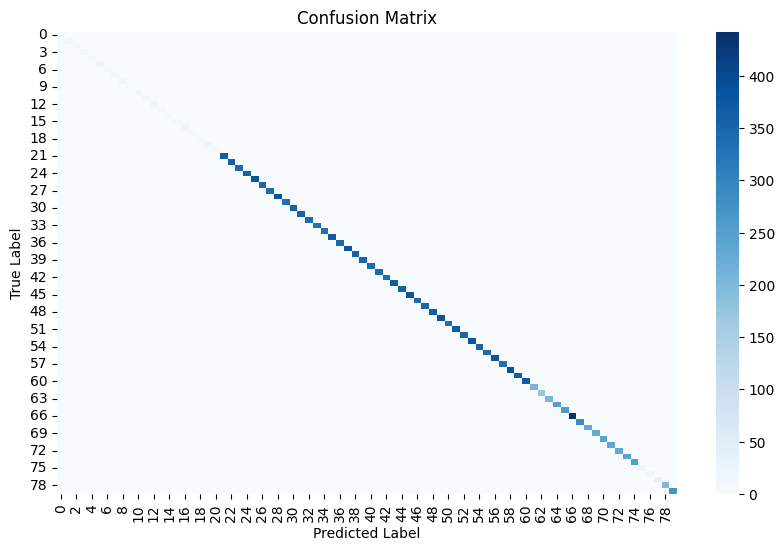

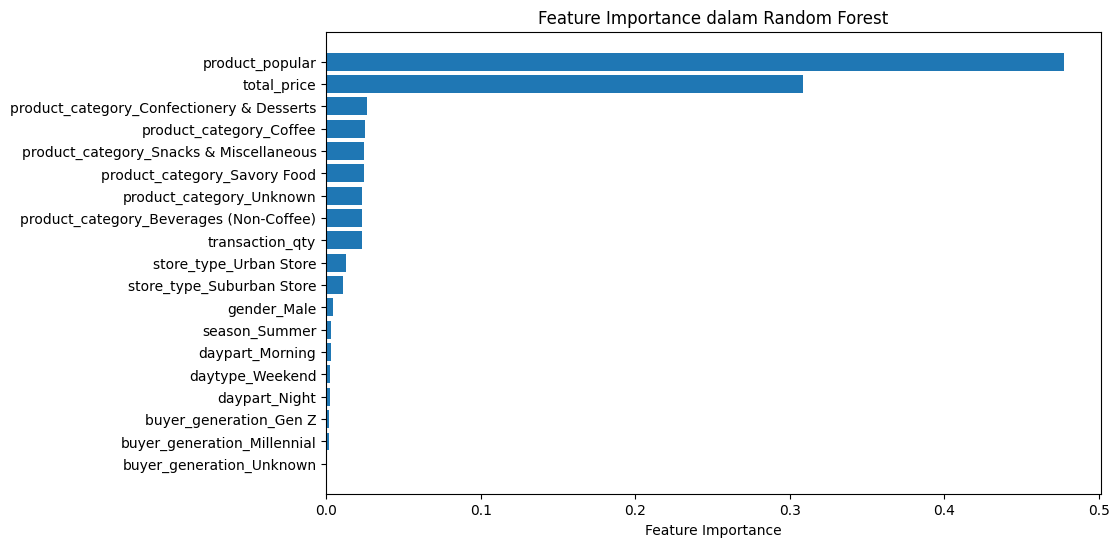

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Evaluasi Model
y_pred = rf_model.predict(X_test)

# Metrik performa
print("Classification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix
plt.figure(figsize=(10, 6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=False, cmap="Blues", fmt="d")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

# 2. Feature Importance
feature_importances = rf_model.feature_importances_
feature_names = X_train.columns
sorted_idx = feature_importances.argsort()

plt.figure(figsize=(10, 6))
plt.barh(range(len(sorted_idx)), feature_importances[sorted_idx], align="center")
plt.yticks(range(len(sorted_idx)), [feature_names[i] for i in sorted_idx])
plt.xlabel("Feature Importance")
plt.title("Feature Importance dalam Random Forest")
plt.show()


Dari hasil evaluasi **Random Forest**:  

1. **Classification Report** → Model memiliki **akurasi tinggi (99%)**, dengan precision, recall, dan f1-score yang hampir sempurna di semua kelas, menunjukkan performa sangat baik.  

2. **Confusion Matrix** → Hampir seluruh prediksi berada di diagonal, menandakan bahwa model mampu mengklasifikasikan produk dengan sangat akurat tanpa banyak kesalahan prediksi antar kelas.  

3. **Feature Importance** → Fitur paling berpengaruh adalah **product_popular** dan **total_price**, diikuti oleh kategori produk. Faktor lain seperti **store_type, transaction_qty, gender, seasonality**, dan **buyer_generation** memiliki pengaruh lebih kecil.  

**Kesimpulan:** Model **sudah optimal** dan tidak perlu perbaikan besar. Model dapat diandalkan untuk memprediksi **product_id** dengan akurasi sangat tinggi.

In [ ]:
print(f"Train Accuracy: {rf_model.score(X_train, y_train):.4f}")
print(f"Test Accuracy: {rf_model.score(X_test, y_test):.4f}")


Train Accuracy: 0.9989
Test Accuracy: 0.9923


Jika train accuracy jauh lebih tinggi dari test accuracy, berarti model overfitting. Namun, selisihnya kecil (0.6%), jadi model tidak overfitting dan generalisasi cukup baik.

In [ ]:
from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(rf_model, X_train, y_train, cv=5)  # 5-fold cross-validation
print(f"Cross-validation accuracy: {cv_scores.mean():.4f} ± {cv_scores.std():.4f}")


Cross-validation accuracy: 0.9910 ± 0.0004


Variasi sangat kecil (±0.0004), berarti model konsisten di berbagai subset data dan tidak hanya bagus di train/test split tertentu.

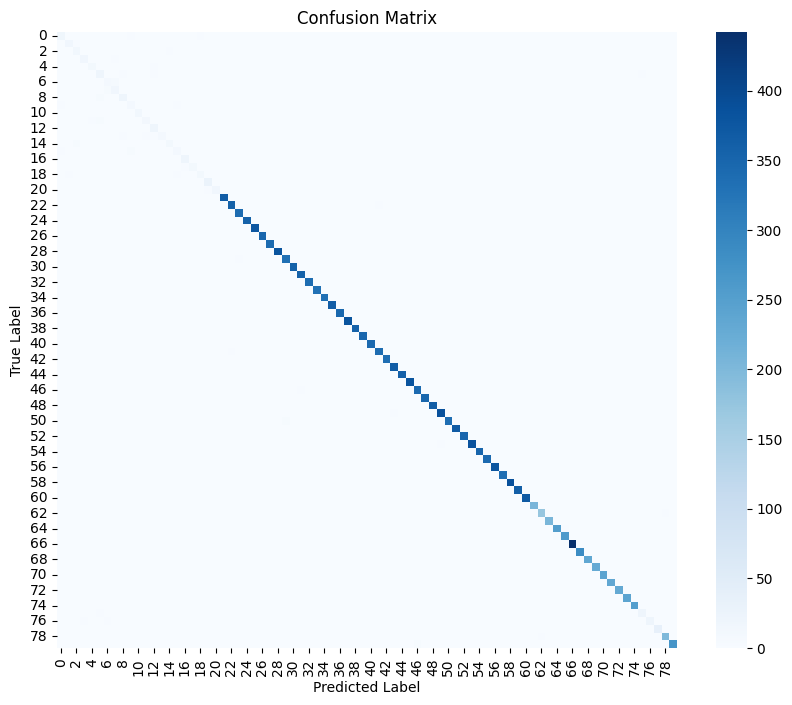

In [ ]:
from sklearn.metrics import confusion_matrix

y_pred = rf_model.predict(X_test)
cm = confusion_matrix(y_test, y_pred)

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=False, fmt="d", cmap="Blues")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()


Grafik ini menunjukkan performa model dalam memprediksi setiap kelas produk.
Warna biru tua pada diagonal menunjukkan banyaknya prediksi yang benar untuk setiap kelas.
Tidak ada titik yang mencolok di luar diagonal, berarti model jarang salah prediksi.